In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#importing the dataset
coffee_data=pd.read_csv(r"C:\Users\MUNYUA CHARLES\Downloads\Coffee Shop Sales.csv")

In [30]:
coffee_data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01-01-2023,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01-01-2023,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01-01-2023,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01-01-2023,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01-01-2023,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [31]:
# Dataset summary
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [32]:
#cheaking for null values 
coffee_data.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [35]:
#Droping "product_id" and "store_id" columns 
coffee_data.drop(columns=['store_id','product_id'],inplace=True)

In [38]:
coffee_data.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_location', 'unit_price', 'product_category',
       'product_type', 'product_detail'],
      dtype='object')

In [41]:
coffee_data.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_location', 'unit_price', 'product_category',
       'product_type', 'product_detail'],
      dtype='object')

In [43]:
#Cheaking for duplicate 
coffee_data.duplicated().sum()

0

In [51]:
#Renaming the columns
coffee_data.rename(columns={
    'transaction_id':'id',
    'transaction_date':'date',
    'transaction_time':'time',
    'transaction_qty':'quantity',
    'store_location':'location',
    'unit_price':'price',
    'product_category':'category',
    'product_type':'product',
    'product_detail':'detail'
},inplace=True )

In [53]:
#Converting data to datetime
coffee_data['date']=pd.to_datetime(coffee_data['date'],dayfirst=True)

In [57]:
coffee_data.dtypes

id                   int64
date        datetime64[ns]
time                object
quantity             int64
location            object
price              float64
category            object
product             object
detail              object
dtype: object

In [61]:
#generating a sales column
coffee_data['sales']=coffee_data['quantity']*coffee_data['price']

In [63]:
coffee_data.sample(2)

,id,date,time,quantity,location,price,category,product,detail,sales
143386,143723,2023-06-25,18:15:14,1,Astoria,3.75,Coffee,Barista Espresso,Latte,3.75
31546,31603,2023-02-25,09:56:42,1,Lower Manhattan,2.20,Coffee,Organic brewed coffee,Brazilian Sm,2.20


In [77]:
#extracting the month,year and weekday_name in full name from date column
coffee_data['month'] = pd.to_datetime(coffee_data['date']).dt.strftime('%B')
coffee_data['year'] = pd.to_datetime(coffee_data['date']).dt.strftime('%Y')
coffee_data['weekday_name'] = pd.to_datetime(coffee_data['date']).dt.day_name()


In [74]:
coffee_data.sample(2)

,id,date,time,quantity,location,price,category,product,detail,sales,month,year,weekday_name
5976,6006,2023-01-11,15:34:25,3,Lower Manhattan,0.80,Flavours,Sugar free syrup,Sugar Free Vanilla syrup,2.40,January,2023,Wednesday
131038,131375,2023-06-15,13:44:13,1,Astoria,3.75,Bakery,Scone,Jumbo Savory Scone,3.75,June,2023,Thursday


In [83]:
#extracting hour from time of the day
coffee_data['hour'] = pd.to_datetime(coffee_data['time'], format='%H:%M:%S').dt.hour


In [85]:
coffee_data.sample(3)

,id,date,time,quantity,location,price,category,product,detail,sales,month,year,weekday_name,hour
26915,26972,2023-02-17,11:12:44,2,Astoria,4.25,Coffee,Barista Espresso,Latte Rg,8.5,February,2023,Friday,11
108222,108476,2023-05-26,12:36:24,2,Astoria,4.25,Coffee,Barista Espresso,Latte Rg,8.5,May,2023,Friday,12
145647,145984,2023-06-27,15:38:49,1,Astoria,3.00,Coffee,Drip coffee,Our Old Time Diner Blend Lg,3.0,June,2023,Tuesday,15


In [87]:
#defining the time of the day 
def get_time_of_day(hour):
    if hour<12:
        return 'Morning'
    elif 12<=hour <18:
        return 'Afternoon'
    else:
        return 'Evening'

In [91]:
coffee_data['time_of_day']=coffee_data['hour'].apply(get_time_of_day)

In [95]:
coffee_data.sample(5)

,id,date,time,quantity,location,price,category,product,detail,sales,month,year,weekday_name,hour,time_of_day
95139,95393,2023-05-14,17:41:00,1,Astoria,23.0,Branded,Housewares,I Need My Bean! Latte cup,23.0,May,2023,Sunday,17,Afternoon
136249,136586,2023-06-19,16:35:36,1,Lower Manhattan,3.1,Coffee,Premium brewed coffee,Jamaican Coffee River Rg,3.1,June,2023,Monday,16,Afternoon
86595,86849,2023-05-07,08:18:01,1,Hell's Kitchen,2.5,Tea,Brewed Black tea,Earl Grey Rg,2.5,May,2023,Sunday,8,Morning
20297,20327,2023-02-06,12:38:11,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,February,2023,Monday,12,Afternoon
34326,34383,2023-03-01,19:39:40,1,Astoria,3.0,Tea,Brewed Black tea,English Breakfast Lg,3.0,March,2023,Wednesday,19,Evening


In [97]:
coffee_data.to_csv('cleaned_coffe_data.csv')

### EDA AND METRICS

In [106]:
palette=sns.set_palette(sns.color_palette('Blues'))

### 0.1 Total Revenue

In [114]:
total_revenue =coffee_data['sales'].sum()
(f"Total revenue: ${total_revenue:,.2f}")

'Total revenue: $698,812.33'

### 0.2 Total Orders

In [127]:
total_orders = coffee_data['id'].nunique()
(f'Total Order: {total_orders:,.2f}')

'Total Order: 149,116.00'

### 0.3 Average Order Value(AOV)

In [134]:
aov =total_revenue/total_orders
(f'Average order value:{aov:,.2f}')

'Average order value:4.69'

### 0.4 Peak sales location and Revenue

In [145]:
peak_sales_location=coffee_data.groupby('location')['sales'].sum()
peak_sales_location

location
Astoria            232243.91
Hell's Kitchen     236511.17
Lower Manhattan    230057.25
Name: sales, dtype: float64

In [151]:
peak_sales_location=coffee_data.groupby('location')['sales'].sum().idxmax()
(f"Peak sales location:  {peak_sales_location}")

"Peak sales location:  Hell's Kitchen"

### 0.5 Sales by month

In [166]:
# sum of sales for each month
revenue=coffee_data.groupby('month')['sales'].sum().reset_index()
revenue 

,month,sales
0,April,118941.08
1,February,76145.19
2,January,81677.74
3,June,166485.88
4,March,98834.68
5,May,156727.76


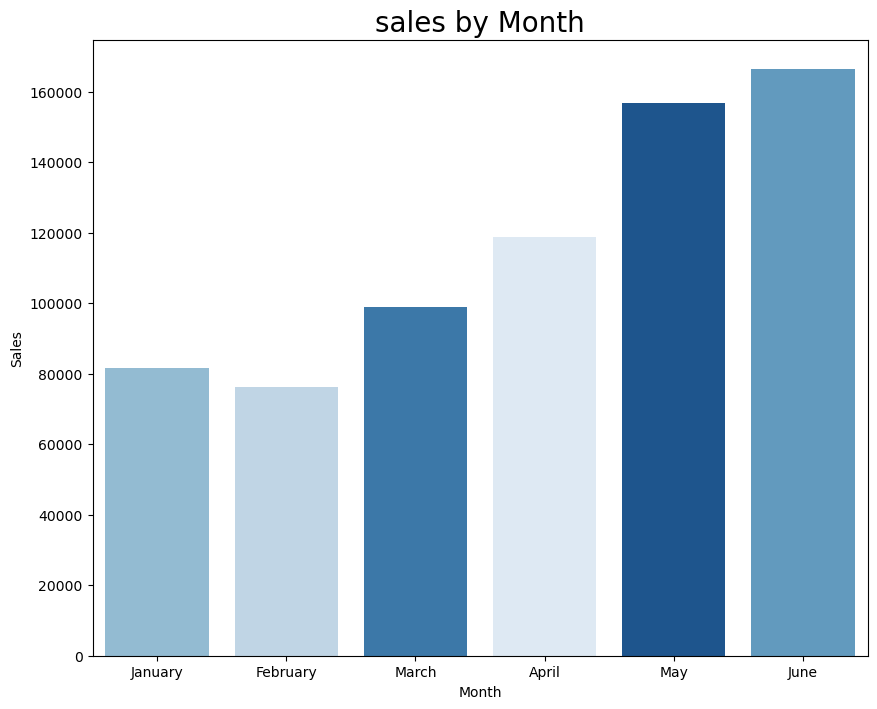

In [174]:
plt.figure(figsize=(10,8))
month_order=['January','February','March','April','May','June']
sns.barplot(data=revenue,
           x='month',
           y='sales',
           hue='month',
           order=month_order,
           errorbar=None)
plt.title('sales by Month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

### 0.6 Sales by Location 

In [177]:
#sum of  sales by location 
location_revenue=coffee_data.groupby('location')['sales'].sum().reset_index()
location_revenue

,location,sales
0,Astoria,232243.91
1,Hell's Kitchen,236511.17
2,Lower Manhattan,230057.25


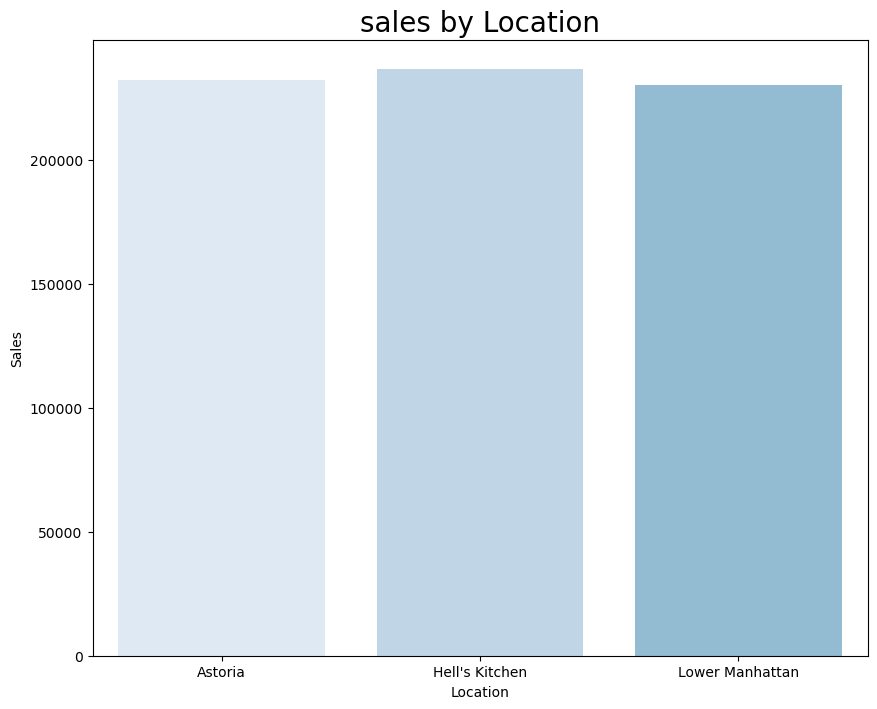

In [208]:
plt.figure(figsize=(10,8))
sns.barplot(data=location_revenue,
           x='location',
           y='sales',
           hue='location',
           errorbar=None)
plt.title('sales by Location',fontsize=20)
plt.xlabel('Location')
plt.ylabel('Sales')
plt.show()

### 0.7 Top 10 Popular products by Revenue

In [184]:
product_revenue=coffee_data.groupby('product')['sales'].sum().reset_index()
product_revenue

,product,sales
0,Barista Espresso,91406.20
1,Biscotti,19793.53
2,Black tea,2711.85
3,Brewed Black tea,47932.00
4,Brewed Chai tea,77081.95
5,Brewed Green tea,23852.50
6,Brewed herbal tea,47539.50
7,Chai tea,4301.25
8,Clothing,6163.00
9,Drinking Chocolate,2728.04


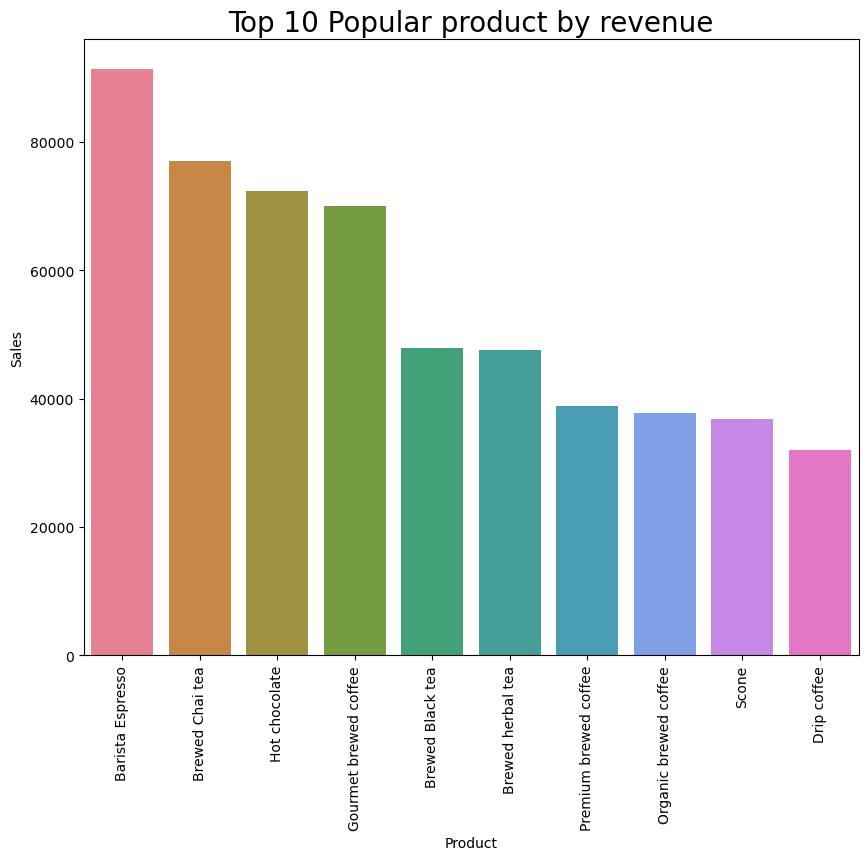

In [199]:
plt.figure(figsize=(10,8))
sns.barplot(data=product_revenue.sort_values('sales',ascending=False)[0:10],
           x='product',
           y='sales',
           hue='product',
           errorbar=None)
plt.title('Top 10 Popular product by revenue',fontsize=20)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

### 0.8 Average Order value (AOV) by Product Category

In [202]:
category_aov=coffee_data.groupby('category')['sales'].mean().reset_index()
category_aov

,category,sales
0,Bakery,3.610969
1,Branded,18.215529
2,Coffee,4.621207
3,Coffee beans,22.866657
4,Drinking Chocolate,6.314615
5,Flavours,1.238409
6,Loose Tea,9.267438
7,Packaged Chocolate,9.050595
8,Tea,4.321458


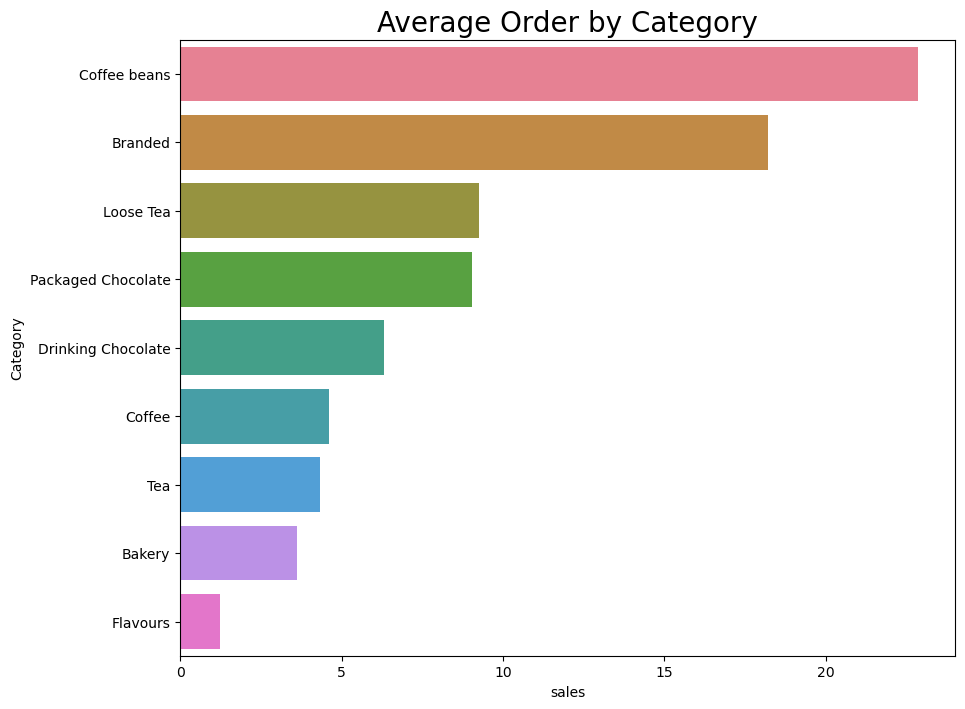

In [206]:
plt.figure(figsize=(10,8))
sns.barplot(data=category_aov.sort_values('sales',ascending=False),
           x='sales',
           y='category',
           hue='category',
           errorbar=None)
plt.title('Average Order by Category',fontsize=20)
plt.xlabel('sales')
plt.ylabel('Category')
plt.show()

### 0.9 Popular Category

In [211]:
category_count=coffee_data['category'].value_counts().reset_index()
category_count

,category,count
0,Coffee,58416
1,Tea,45449
2,Bakery,22796
3,Drinking Chocolate,11468
4,Flavours,6790
5,Coffee beans,1753
6,Loose Tea,1210
7,Branded,747
8,Packaged Chocolate,487


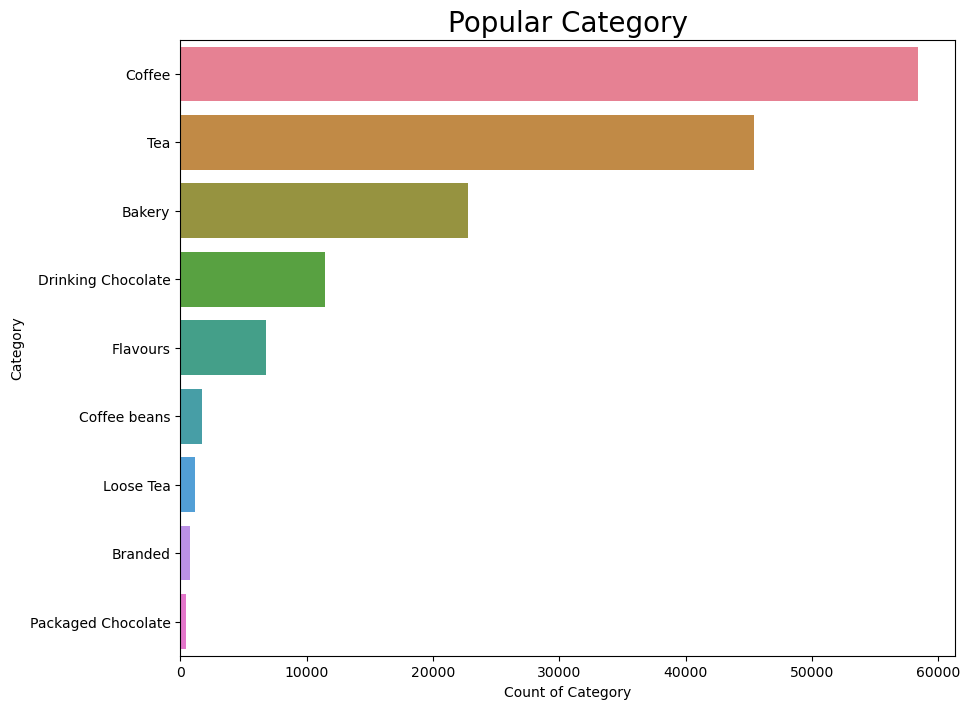

In [213]:
plt.figure(figsize=(10,8))
sns.barplot(data=category_count,
           x='count',
           y='category',
           hue='category',
           errorbar=None)
plt.title('Popular Category',fontsize=20)
plt.xlabel('Count of Category')
plt.ylabel('Category')
plt.show()

### 0.10 Peak Hour

In [216]:
order_per_hour=coffee_data.groupby('hour')['id'].count().reset_index()
order_per_hour

,hour,id
0,6,4594
1,7,13428
2,8,17654
3,9,17764
4,10,18545
5,11,9766
6,12,8708
7,13,8714
8,14,8933
9,15,8979


In [218]:
# renaming the columns
order_per_hour.rename(columns={'id':"count_of_orders"},inplace=True)

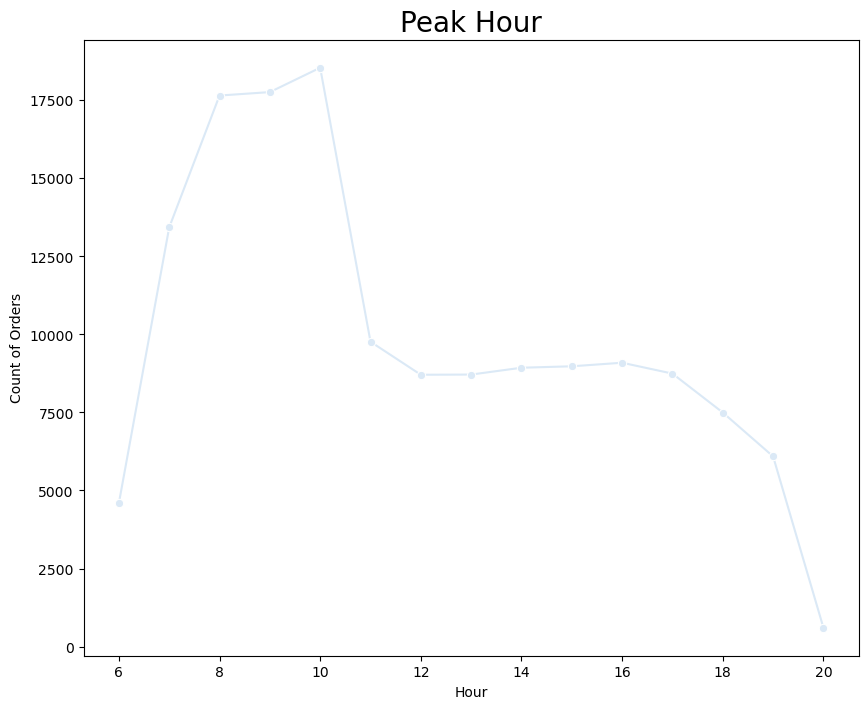

In [224]:
plt.figure(figsize=(10,8))
sns.lineplot(data=order_per_hour,
           x='hour',
           y='count_of_orders',
            marker='o')
plt.title('Peak Hour',fontsize=20)
plt.xlabel('Hour')
plt.ylabel('Count of Orders')
plt.show()

### 0.11 Peak Day

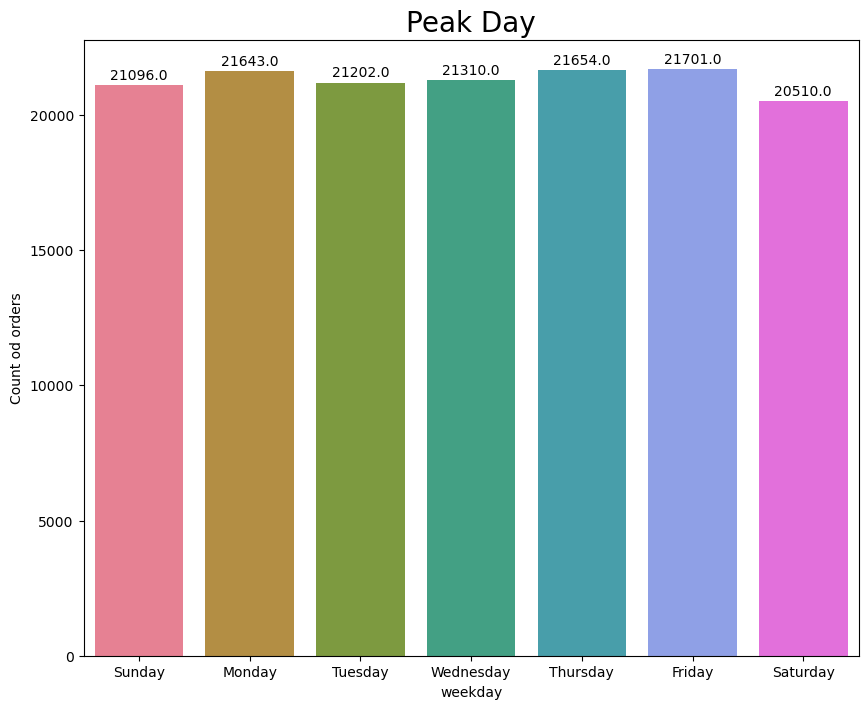

In [229]:
plt.figure(figsize=(10,8))
weekdays_order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
ax=sns.countplot(
                data=coffee_data,
                x='weekday_name',
                hue='weekday_name',
                order=weekdays_order)
# counting values inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),   # x and y position of the text
                ha = 'center', va = 'center', 
                xytext = (0, 7), textcoords='offset points')  
plt.xlabel('weekday')
plt.ylabel('Count od orders')
plt.title('Peak Day',fontsize=20)
plt.show()




### 0.12 Distribution of orders across different cofffee types

In [234]:
coffee_type = coffee_data[coffee_data['category'] == 'Coffee'][['product']]
coffee_type

,product
0,Gourmet brewed coffee
3,Drip coffee
6,Drip coffee
7,Gourmet brewed coffee
8,Barista Espresso
...,...
149103,Organic brewed coffee
149104,Premium brewed coffee
149105,Drip coffee
149106,Gourmet brewed coffee


In [238]:
coffee_type_count=coffee_type['product'].value_counts().reset_index()
coffee_type_count

,product,count
0,Gourmet brewed coffee,16912
1,Barista Espresso,16403
2,Organic brewed coffee,8489
3,Drip coffee,8477
4,Premium brewed coffee,8135


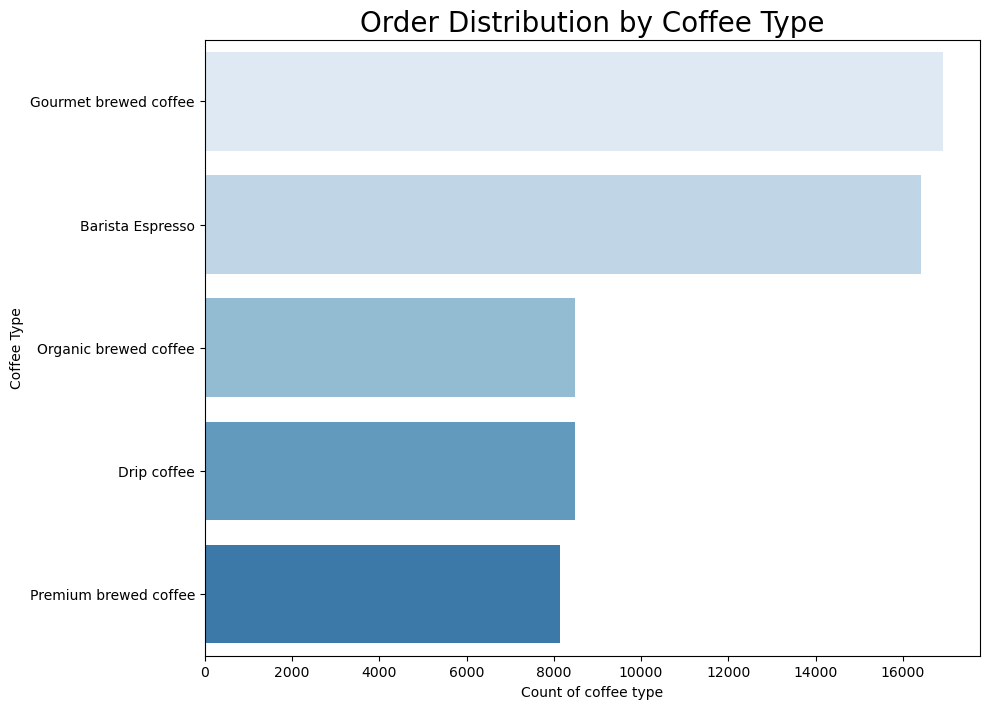

In [242]:
plt.figure(figsize=(10,8))
sns.barplot(data=coffee_type_count,
           x='count',
           y='product',
           hue='product')
plt.title('Order Distribution by Coffee Type',fontsize=20)
plt.xlabel('Count of coffee type')
plt.ylabel('Coffee Type')
plt.show()